## **0. Introduction**

This notebook follows after the "General Linear Model.iypnb" notebook. Aim of this notebook is to conduct the logistic regression algorithm. For now, we have 26 z-maps, so one for each contrast, for each session, i.e. 4 * 26 z-maps.

## **1. Masking**

First we will need to load the mask. The masks needs to be fetched from the openneuro dataset. This is done with *datalad*.

We cd into the local dataset directory and then use the command:

datalad get sourcedata/sub-01/anat.

The masks are bi-lateral organised, meaning one mask per hemisphere. For starters, ventral portion of the v1 cortex in the left hemisphere (LH_V1v) will be the first mask.

In [1]:
import os

os.chdir("/home/jpauli/ds001506/sourcedata/sub-01/anat")
os.listdir()

['sub-01_mask_LH_FFA.nii.gz',
 'sub-01_mask_LH_hV4.nii.gz',
 'sub-01_mask_LH_HVC.nii.gz',
 'sub-01_mask_LH_LOC.nii.gz',
 'sub-01_mask_LH_PPA.nii.gz',
 'sub-01_mask_LH_V1d.nii.gz',
 'sub-01_mask_LH_V1v.nii.gz',
 'sub-01_mask_LH_V2d.nii.gz',
 'sub-01_mask_LH_V2v.nii.gz',
 'sub-01_mask_LH_V3d.nii.gz',
 'sub-01_mask_LH_V3v.nii.gz',
 'sub-01_mask_RH_FFA.nii.gz',
 'sub-01_mask_RH_hV4.nii.gz',
 'sub-01_mask_RH_HVC.nii.gz',
 'sub-01_mask_RH_LOC.nii.gz',
 'sub-01_mask_RH_PPA.nii.gz',
 'sub-01_mask_RH_V1d.nii.gz',
 'sub-01_mask_RH_V1v.nii.gz',
 'sub-01_mask_RH_V2d.nii.gz',
 'sub-01_mask_RH_V2v.nii.gz',
 'sub-01_mask_RH_V3d.nii.gz',
 'sub-01_mask_RH_V3v.nii.gz']

In [2]:
len(os.listdir())

22

We can see that there are 22 masks in total, 11 for each hemisphere. 

In [3]:
mask_img_path = '/home/jpauli/ds001506/sourcedata/sub-01/anat'
mask_img_L = os.path.join(mask_img_path,'sub-01_mask_LH_V1v.nii.gz')
mask_img_R = os.path.join(mask_img_path,'sub-01_mask_RH_LOC.nii.gz')

In [4]:
func_filename_path = '/mnt/c/Users/janos/git/sessions_new/z_maps_3'
func_filename =  os.path.join(func_filename_path,'03_active -1443537.0_z_map.nii.gz')
#os.chdir('/mnt/c/Users/janos/git/sessions/z_maps_2')

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/numpy/ma/core.py:2830: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


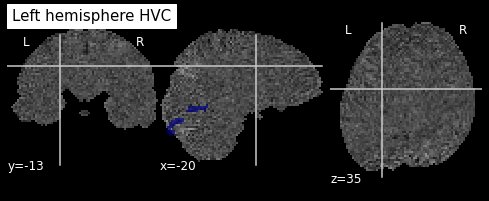

In [5]:
coordinates_func = (-20,-13,35)
from nilearn.plotting import plot_roi
plot_roi(mask_img_L, func_filename,display_mode='ortho',cut_coords=coordinates_func,
         title="Left hemisphere HVC")

Now the next step is to load in the X and Y variables. We will do this by applying Nilearns Niftimasker function on the z_maps we calculated.

In [6]:
from nilearn.maskers import NiftiMasker
nifti_masker = NiftiMasker(mask_img=mask_img_L)

This loops helps us in extracting the time series from each z-map.
Also, we append values to the Y list. We have 26 different categories we want to decode. Since there are 4 sessions in total and the categories are the same for each session, we will add a "1" for category one and so on to the Y list.

In [7]:
X = []
Y = []
Sessions = []
category = 1
cat_index = 0
cat_index_boundary = 5
for session in ["1","2","3","4"]:
    os.chdir('/mnt/c/Users/janos/git/sessions_new/z_maps_{}_perrun'.format(session))
    for x in os.listdir():
        if x == 'nilearn_cache':
            continue
        else:
            X.append(nifti_masker.fit_transform(x))
            Y.append(category)
            Sessions.append(session)
            cat_index = cat_index + 1
            if cat_index == cat_index_boundary:
                category=category+1
                cat_index_boundary = cat_index_boundary+5
            if category == 27:
                category = 1
        
            
        
        
        



In [8]:
import numpy as np
Y = np.array(Y)
Y.shape
Y.shape

(520,)

In [9]:
Y_ses = np.array(Sessions)
Y_ses.shape

(520,)

In [10]:
groups = Y_ses[0:390]

In [11]:
import pandas as pd
df =  pd.DataFrame(np.concatenate(X))

In [12]:
X_ = df.to_numpy()
X_.shape

(520, 992)

In [14]:
X_train = X_[0:390]
y_train = Y[0:390]

X_test = X_[390:520] #leaving session 4 out
y_test = Y[390:520]

In [27]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()


In [28]:
X_train = scaler.fit_transform(X_train)

In [15]:
from sklearn.model_selection import LeaveOneGroupOut

L = LeaveOneGroupOut()

In [16]:
t = []
t1 = []

In [17]:
for i, (train_index, test_index) in enumerate(L.split(X_train,y_train,groups)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, group={groups[train_index]}")
    print(f"  Test:  index={test_index}, group={groups[test_index]}")
    t.append(train_index)
    t1.append(test_index)

Fold 0:
  Train: index=[130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363
 364 365 366 367 368 369 370

In [69]:
cv=LeaveOneGroupOut().split(X_train, y_train, groups)
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(multi_class='ovr', penalty = 'l2', solver = 'liblinear',cv=cv)

In [73]:
grid={"penalty":["l1","l2"], "solver": ['liblinear','lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [74]:
grid

{'penalty': ['l1', 'l2'],
 'solver': ['liblinear',
  'lbfgs',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg=LogisticRegressionCV(multi_class = 'ovr')
logreg_cv=GridSearchCV(logreg,grid)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

TypeError: can't pickle generator objects

In [59]:
tuned_hyperparameters = {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

In [63]:
model = LogisticRegressionCV(multi_class = 'ovr', penalty = "l2",solver = 'saga')

In [70]:
model.fit(X_train,y_train)

LogisticRegressionCV(cv=<generator object BaseCrossValidator.split at 0x7f773fd7b5e8>,
                     multi_class='ovr', solver='liblinear')

In [72]:
from sklearn.metrics import classification_report
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00        15
          17       1.00      1.00      1.00        15
          18       1.00    

In [43]:
model.score(X_train,y_train)

1.0

In [45]:
model.score(scaler.transform(X_test),y_test)

0.06153846153846154

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(m,X_train,y_train,cv=cv)

## **2.0 Examing the voxel pattern**

The shape of our input array X tells us, that we have n_samples = 104 and n_features = 992.
The features relate to the amount of voxels extracted. The samples are the 26 categories multiplied by all 4 sessions.

First, we will take a look at the correlation matrix.

Text(0, 0.5, 'Samples')

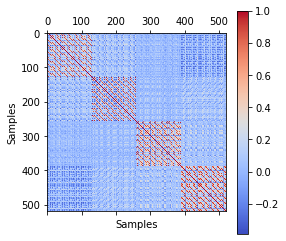

In [12]:
import matplotlib.pyplot as plt
corr =np.corrcoef(X_)
plt.matshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xlabel('Samples')
plt.ylabel('Samples')

The correlation matrix tells us, that there are 4 large patterns to detect. The correlation patterns are between each session. This means, that there is a huge correlation within each session, but not between sessions. This could lead to some problems later on. We will first examine the voxel pattern, run the logist regression model and then see, how much the correlation will affect our results.

We now want to examine the voxel pattern for different given categories and sessions. This can help with understanding the data we are dealing with.

In [13]:
X_1 = np.reshape(X_[0],(31,32))
X_11 = np.reshape(X_[25],(31,32))
X_12 = np.reshape(X_[51],(31,32))
X_13 = np.reshape(X_[77],(31,32))


X_2 = np.reshape(X_[1],(31,32))
X_21 = np.reshape(X_[26],(31,32))
X_22 = np.reshape(X_[52],(31,32))
X_23 = np.reshape(X_[78],(31,32))

X_3 = np.reshape(X_[2],(31,32))
X_31 = np.reshape(X_[27],(31,32))
X_32 = np.reshape(X_[53],(31,32))
X_33 = np.reshape(X_[79],(31,32))

X_4 = np.reshape(X_[3],(31,32))
X_41 = np.reshape(X_[28],(31,32))
X_42 = np.reshape(X_[54],(31,32))
X_43 = np.reshape(X_[80],(31,32))

Text(0.5, 0.98, 'Voxel pattern for category one for all four sessions')

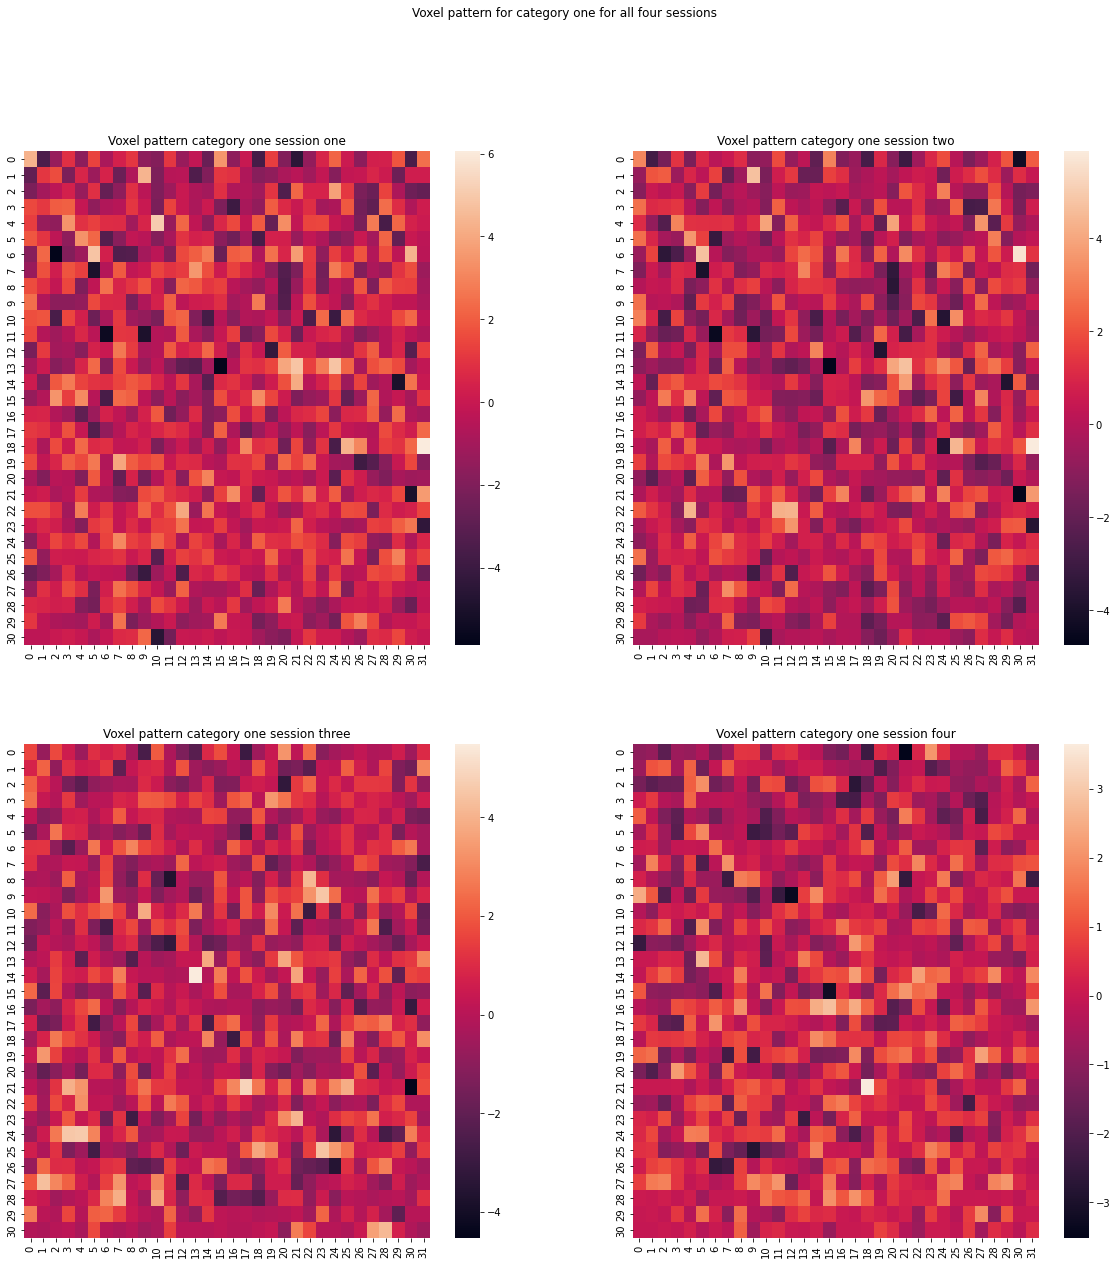

In [14]:
import seaborn as sns
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_1,ax=axis[0,0])
im2= sns.heatmap(X_11,ax=axis[0,1])
im3= sns.heatmap(X_12,ax=axis[1,0])
im4= sns.heatmap(X_13, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category one session one")
axis[0, 1].set_title("Voxel pattern category one session two")
axis[1, 0].set_title("Voxel pattern category one session three")
axis[1, 1].set_title("Voxel pattern category one session four")

figure.suptitle('Voxel pattern for category one for all four sessions')

Text(0.5, 0.98, 'Voxel pattern for category two for all four sessions')

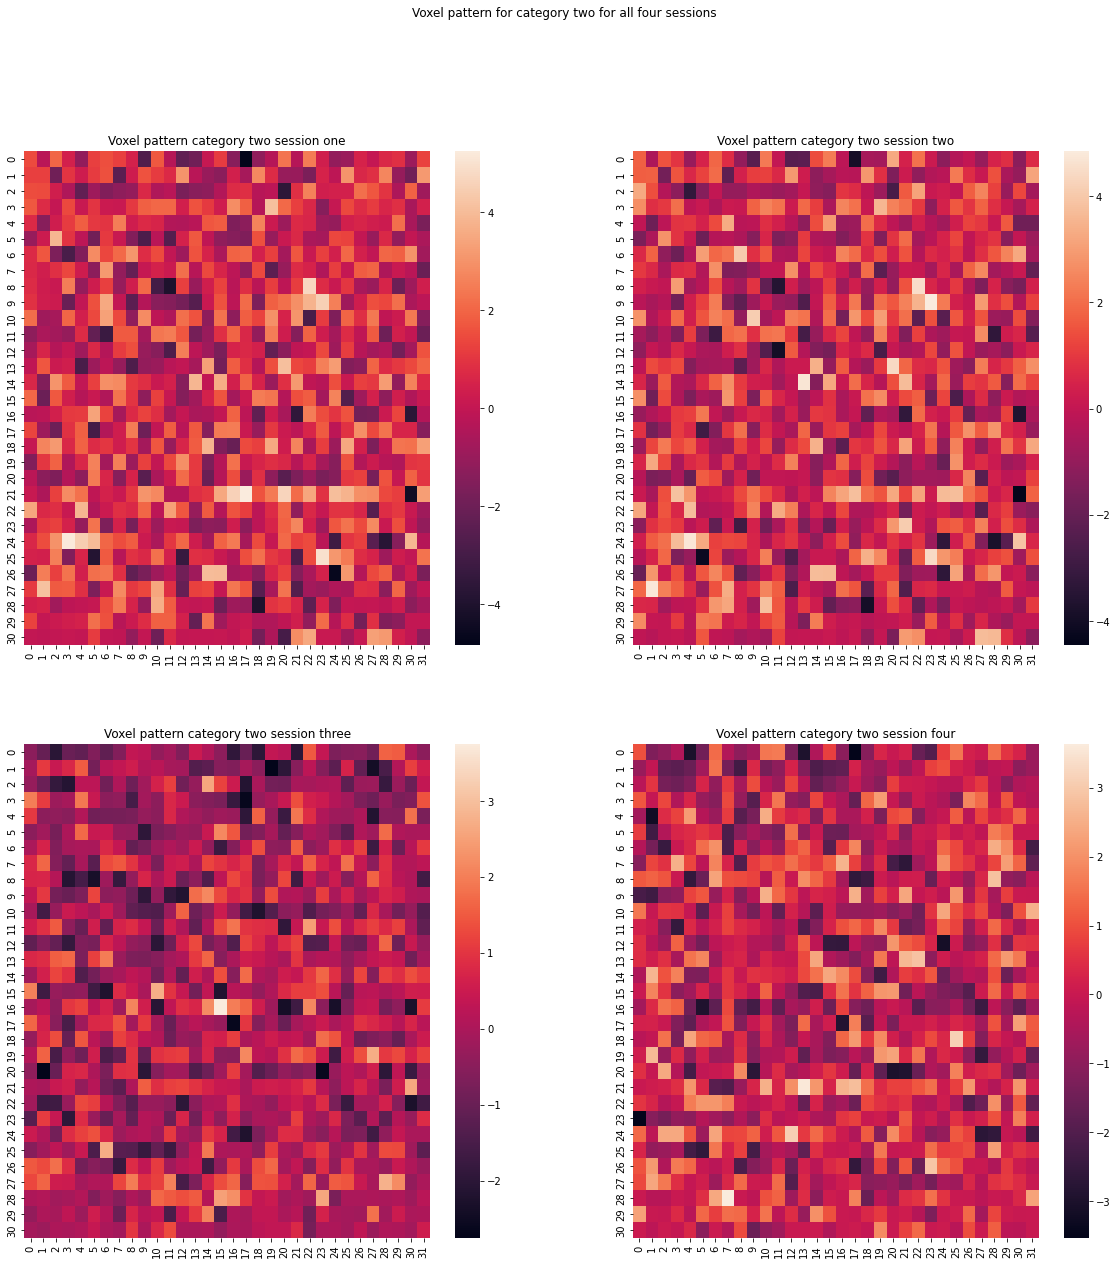

In [15]:
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_2,ax=axis[0,0])
im2= sns.heatmap(X_21,ax=axis[0,1])
im3= sns.heatmap(X_22,ax=axis[1,0])
im4= sns.heatmap(X_23, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category two session one")
axis[0, 1].set_title("Voxel pattern category two session two")
axis[1, 0].set_title("Voxel pattern category two session three")
axis[1, 1].set_title("Voxel pattern category two session four")

figure.suptitle('Voxel pattern for category two for all four sessions')

Text(0.5, 0.98, 'Voxel pattern for category three for all four sessions')

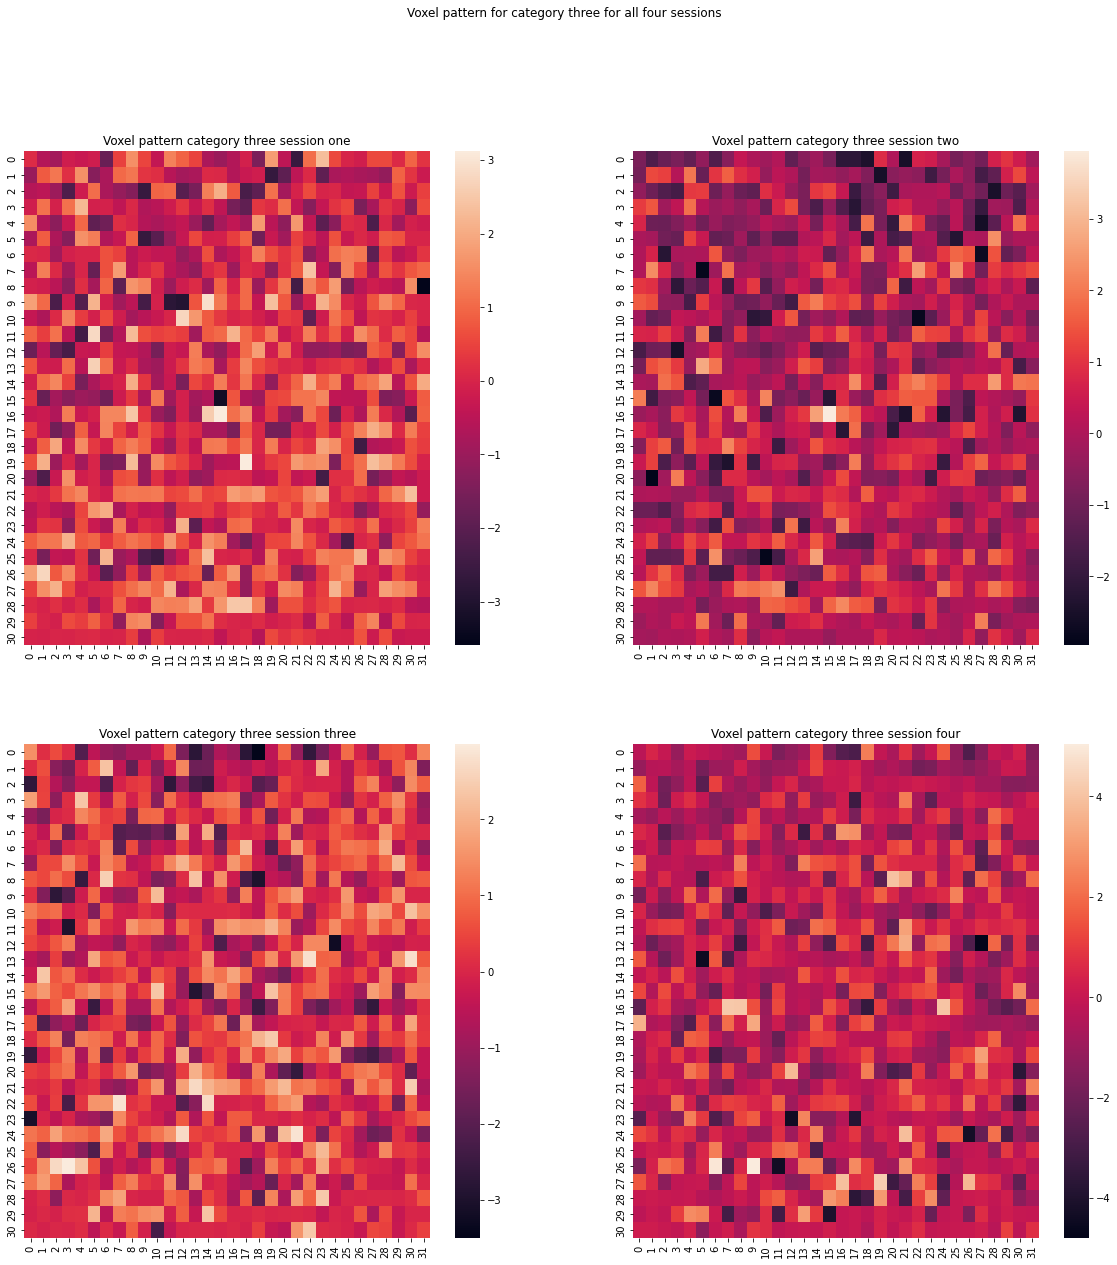

In [16]:

figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_3,ax=axis[0,0])
im2= sns.heatmap(X_31,ax=axis[0,1])
im3= sns.heatmap(X_32,ax=axis[1,0])
im4= sns.heatmap(X_33, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category three session one")
axis[0, 1].set_title("Voxel pattern category three session two")
axis[1, 0].set_title("Voxel pattern category three session three")
axis[1, 1].set_title("Voxel pattern category three session four")

figure.suptitle('Voxel pattern for category three for all four sessions')

Text(0.5, 0.98, 'Voxel pattern for category four for all four sessions')

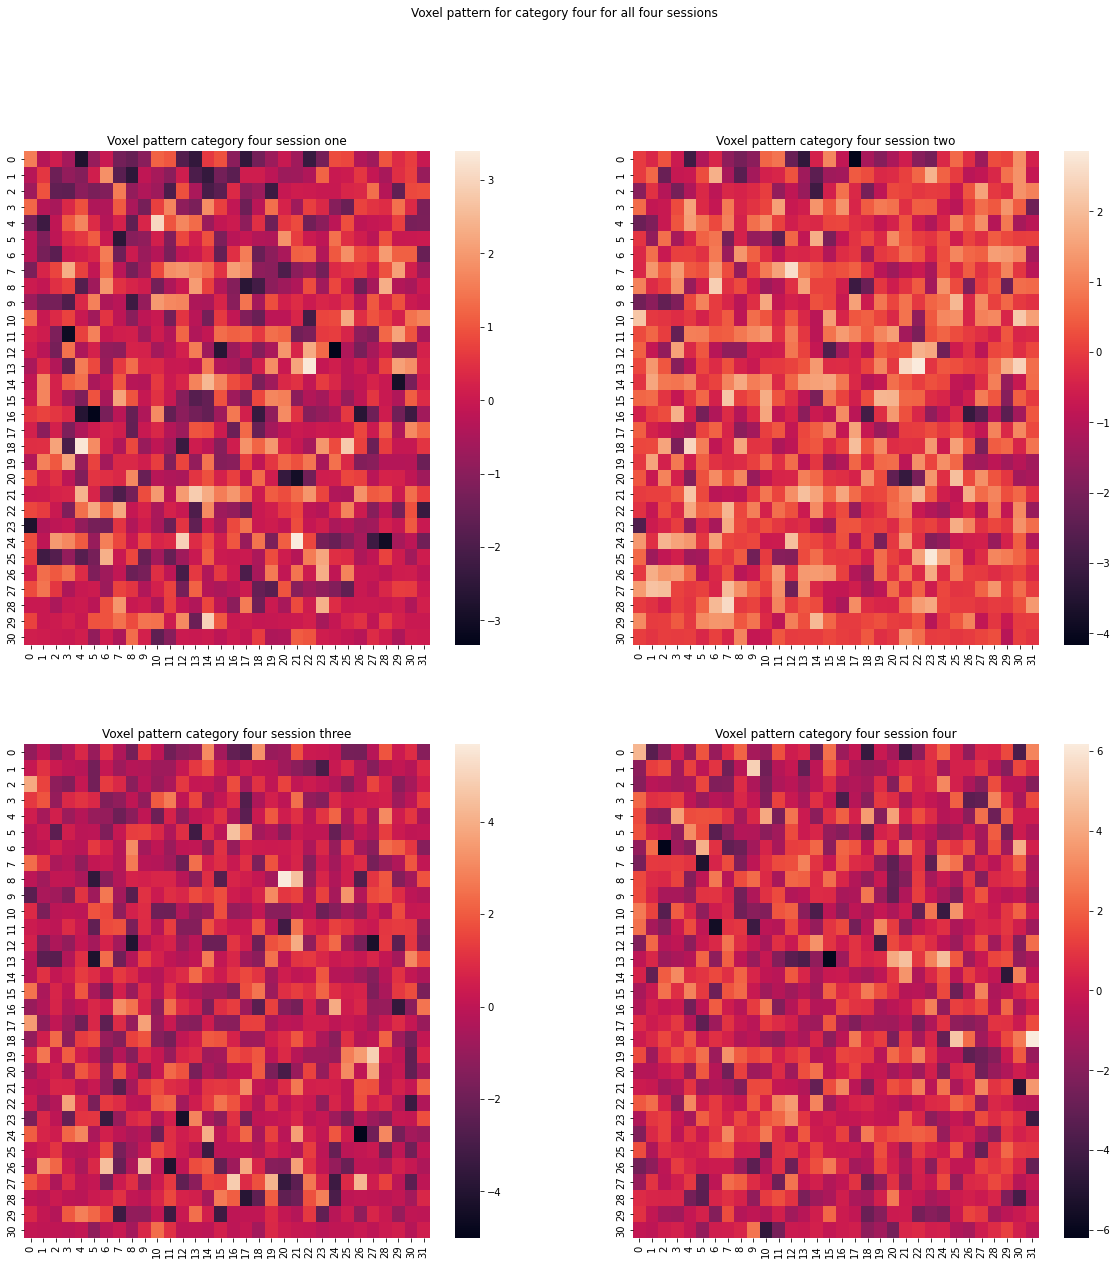

In [17]:

figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_4,ax=axis[0,0])
im2= sns.heatmap(X_41,ax=axis[0,1])
im3= sns.heatmap(X_42,ax=axis[1,0])
im4= sns.heatmap(X_43, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category four session one")
axis[0, 1].set_title("Voxel pattern category four session two")
axis[1, 0].set_title("Voxel pattern category four session three")
axis[1, 1].set_title("Voxel pattern category four session four")

figure.suptitle('Voxel pattern for category four for all four sessions')

Text(0.5, 0.98, 'Voxel pattern for four different categories in session one')

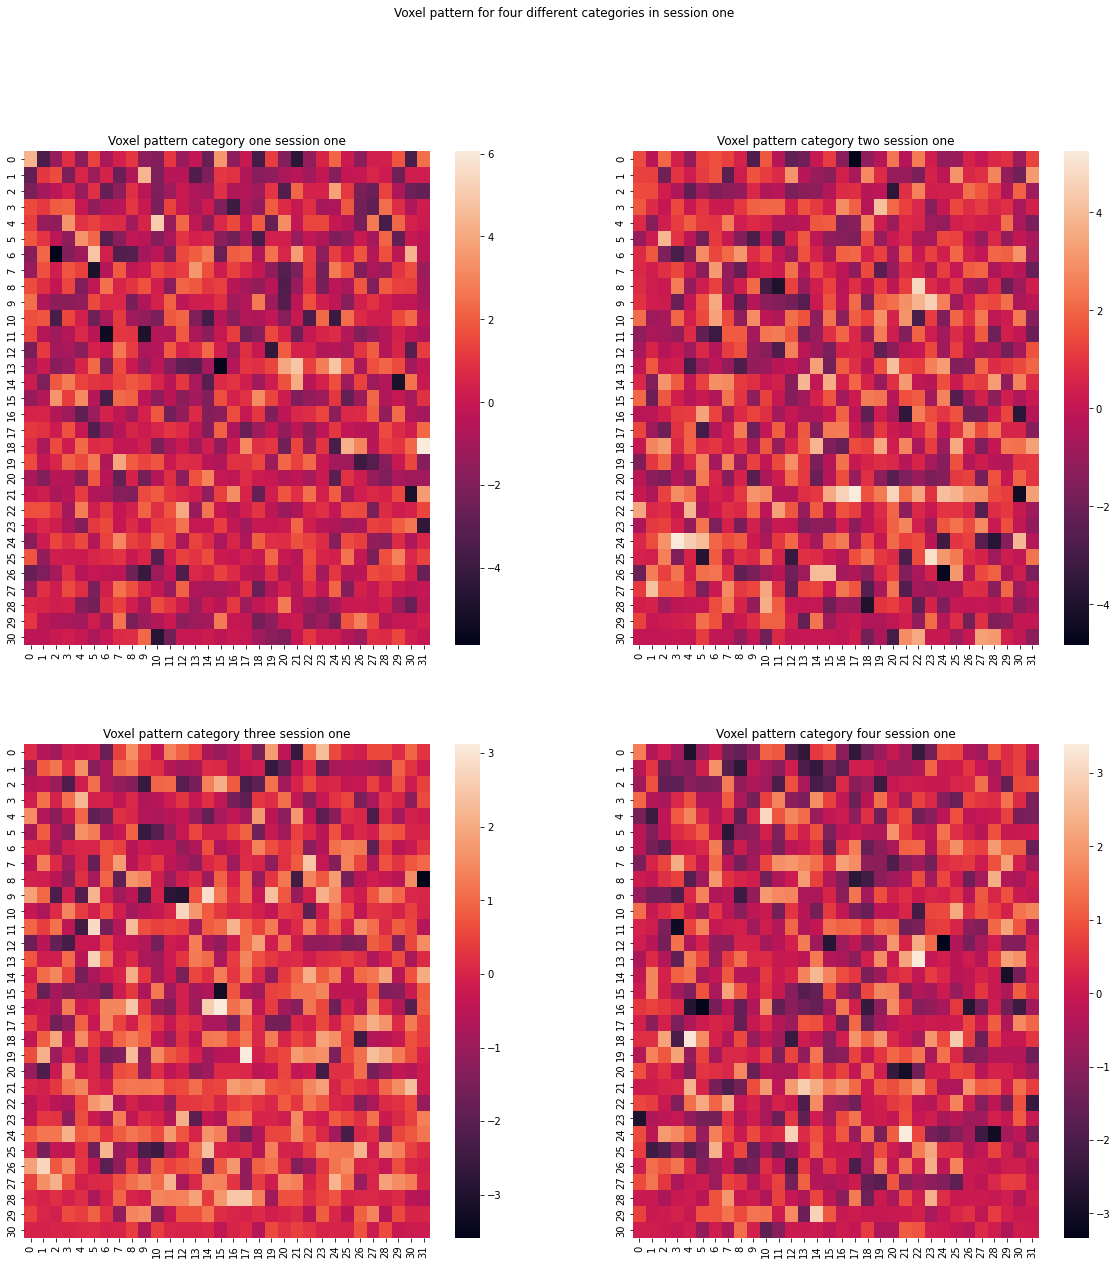

In [18]:
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_1,ax=axis[0,0])
im2= sns.heatmap(X_2,ax=axis[0,1])
im3= sns.heatmap(X_3,ax=axis[1,0])
im4= sns.heatmap(X_4, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category one session one")
axis[0, 1].set_title("Voxel pattern category two session one")
axis[1, 0].set_title("Voxel pattern category three session one")
axis[1, 1].set_title("Voxel pattern category four session one")

figure.suptitle('Voxel pattern for four different categories in session one')

Text(0.5, 0.98, 'Voxel pattern for four different categories in session two')

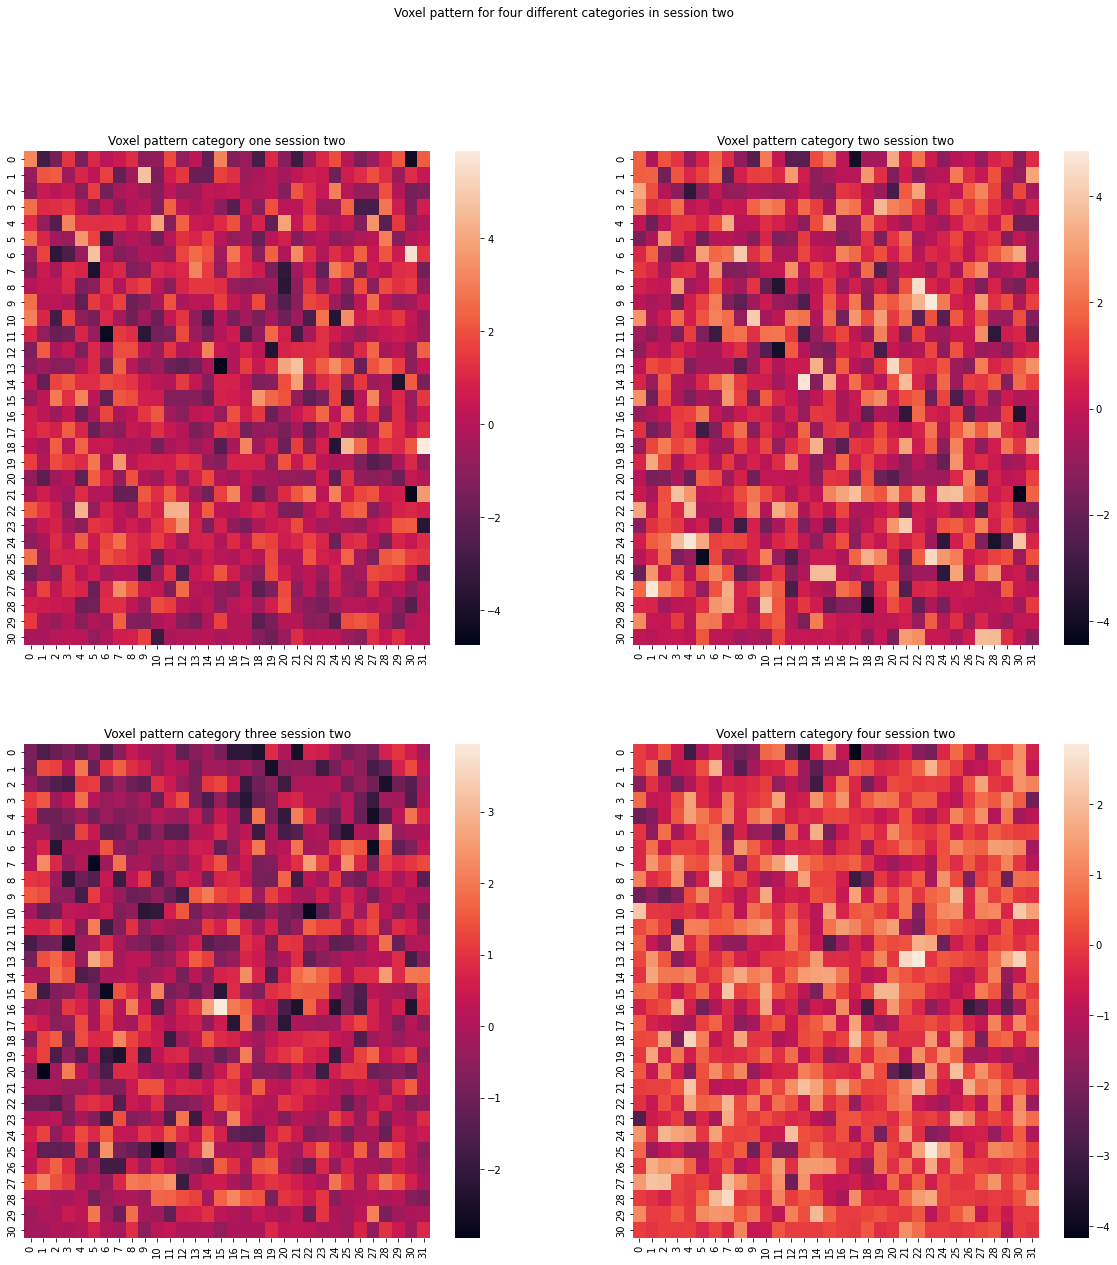

In [19]:
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_11,ax=axis[0,0])
im2= sns.heatmap(X_21,ax=axis[0,1])
im3= sns.heatmap(X_31,ax=axis[1,0])
im4= sns.heatmap(X_41, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category one session two")
axis[0, 1].set_title("Voxel pattern category two session two")
axis[1, 0].set_title("Voxel pattern category three session two")
axis[1, 1].set_title("Voxel pattern category four session two")

figure.suptitle('Voxel pattern for four different categories in session two')

Text(0.5, 0.98, 'Voxel pattern for four different categories in session three')

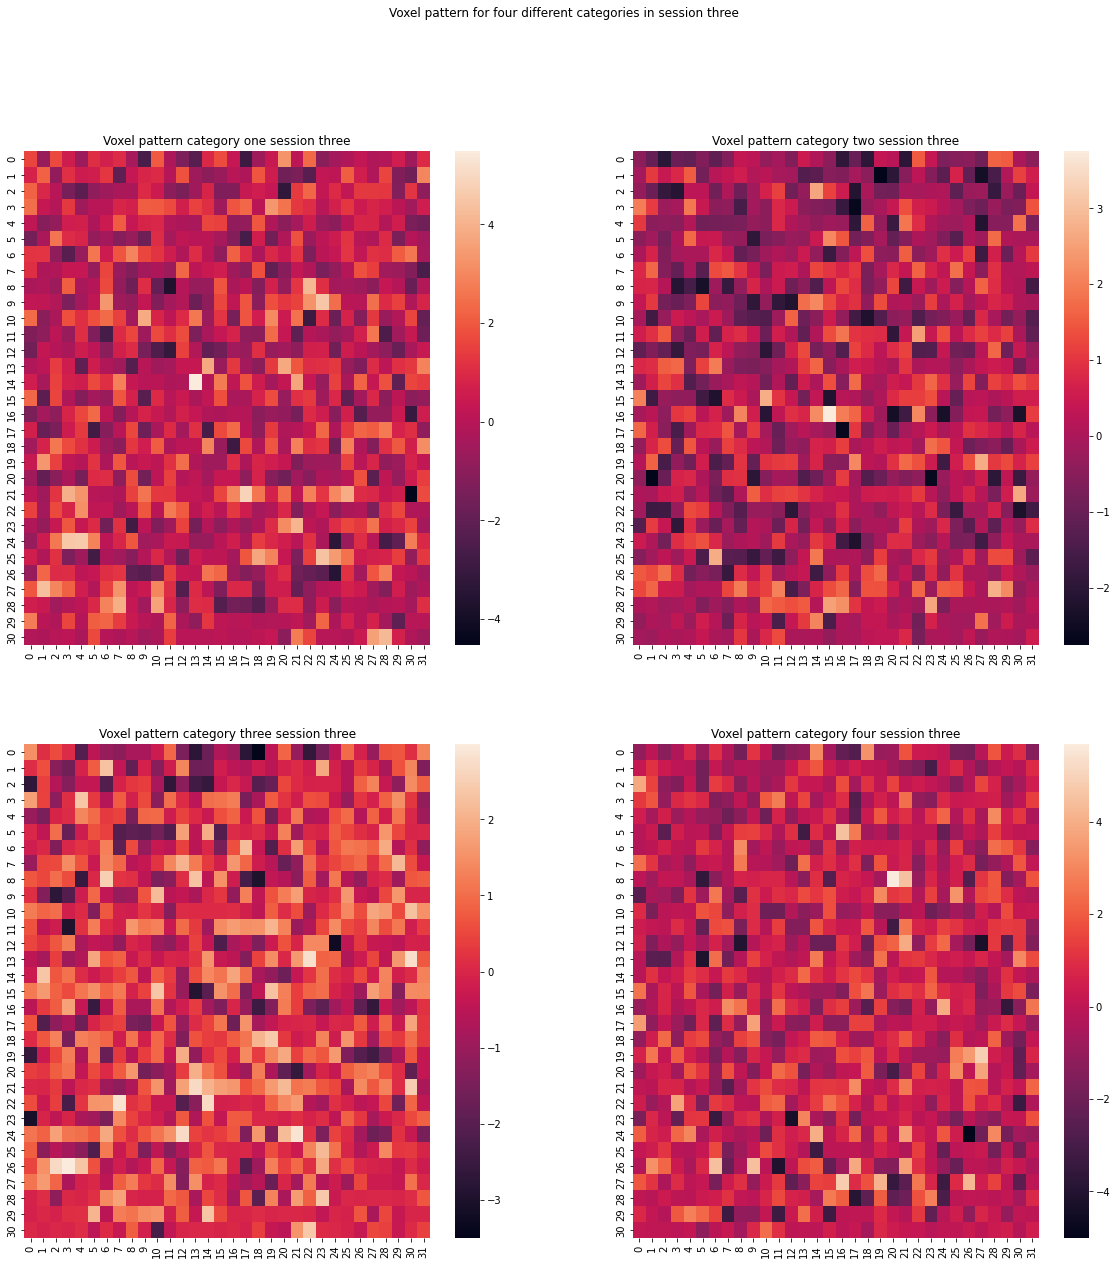

In [20]:
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_12,ax=axis[0,0])
im2= sns.heatmap(X_22,ax=axis[0,1])
im3= sns.heatmap(X_32,ax=axis[1,0])
im4= sns.heatmap(X_42, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category one session three")
axis[0, 1].set_title("Voxel pattern category two session three")
axis[1, 0].set_title("Voxel pattern category three session three")
axis[1, 1].set_title("Voxel pattern category four session three")

figure.suptitle('Voxel pattern for four different categories in session three')

Text(0.5, 0.98, 'Voxel pattern for four different categories in session four')

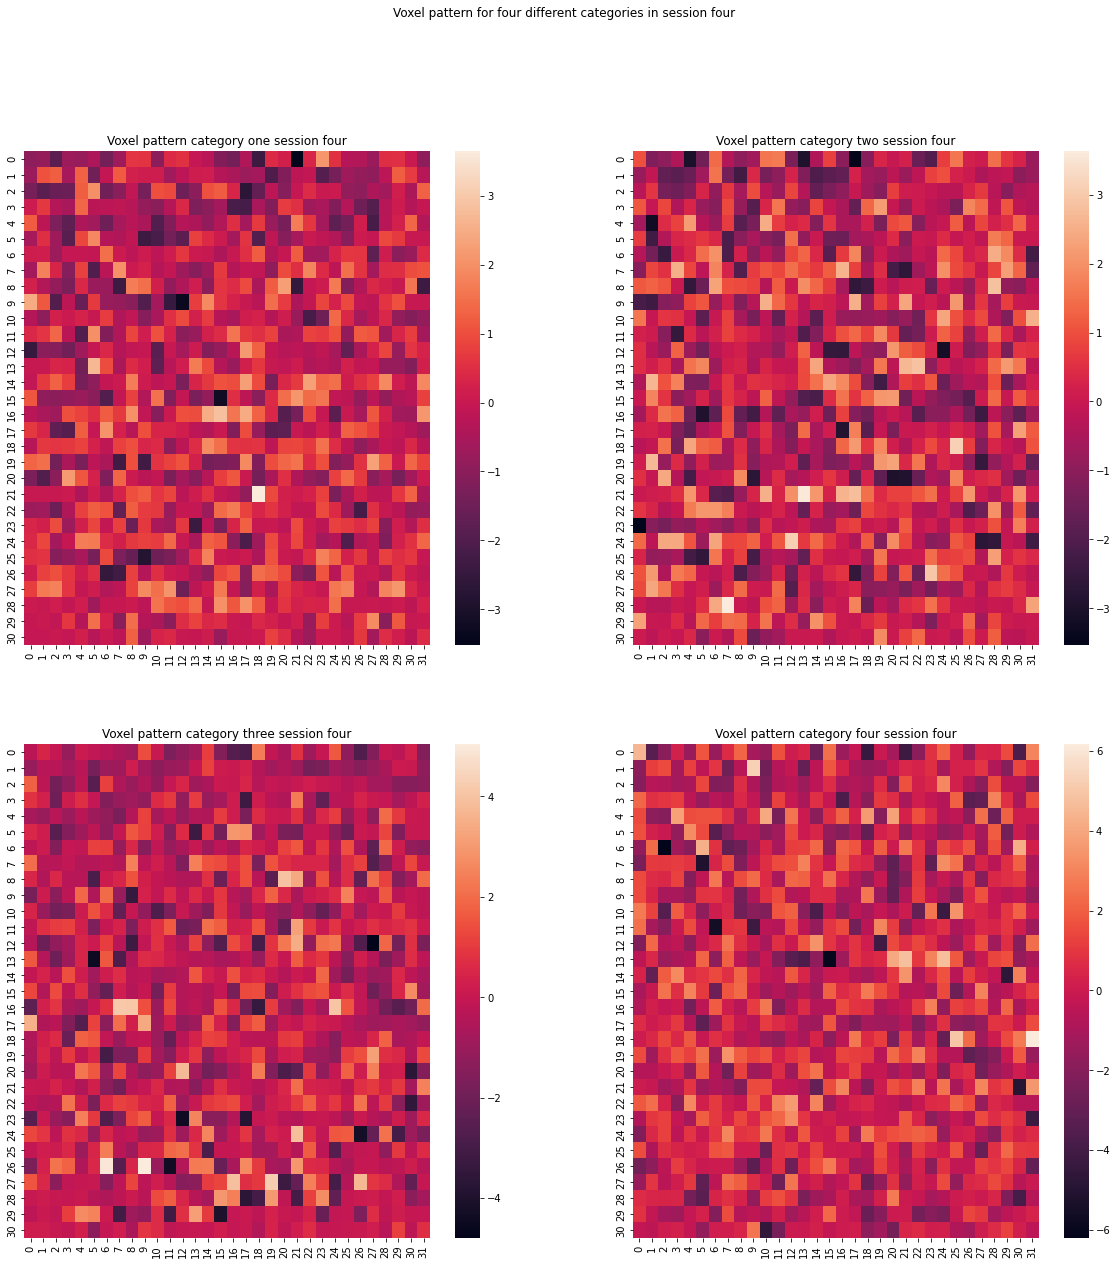

In [21]:
figure, axis = plt.subplots(2, 2,figsize=(20, 20))
im1 = sns.heatmap(X_13,ax=axis[0,0])
im2= sns.heatmap(X_23,ax=axis[0,1])
im3= sns.heatmap(X_33,ax=axis[1,0])
im4= sns.heatmap(X_43, ax=axis[1,1])

#figure.colorbar(orientation='vertical')
axis[0, 0].set_title("Voxel pattern category one session four")
axis[0, 1].set_title("Voxel pattern category two session four")
axis[1, 0].set_title("Voxel pattern category three session four")
axis[1, 1].set_title("Voxel pattern category four session four")

figure.suptitle('Voxel pattern for four different categories in session four')

Results:
(.......)

## **3.0 Logistic regression**

We now use sklearns train_test_split function to seperate our X and Y variables into training and testing data. We set test_size to 0.2, so we use 80% of the data for training and 20% for testing.

We are also going to normalize our X data with sklearns *processing* module. In order to do so, we will fit_transform the scaler on to the training data. The scaler has to be solely fitted on to the test data later on.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.2, random_state=42)

In [23]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_s = scaler.fit_transform(X_train)

In [24]:
X_train_s

array([[ 2.64917891, -2.64553965, -0.99305767, ...,  1.36191438,
         2.75607907, -0.08791735],
       [ 0.77844309,  0.10000231,  1.80385961, ...,  0.17967888,
         0.03273082, -2.62331056],
       [-0.06570151, -0.21416028, -0.56115439, ..., -0.53804601,
        -1.51282094, -0.40462765],
       ...,
       [-1.33283106, -0.63989117,  0.67598363, ...,  0.45854829,
        -0.24723161, -0.67767179],
       [-0.14811615, -0.22006141, -0.01764536, ...,  0.23074111,
        -1.11073331,  0.72772915],
       [-0.4429714 , -0.62463423, -0.64368391, ..., -0.54341624,
         0.75573819,  0.22432805]])

Now that we have defined the test and training data, it is time to setup our Logistic Regression model. We will define and then fit it on the training data. Afterwards, we will take a look on how well it can predict the test data.

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1,multi_class='ovr', penalty = 'l1', solver = 'liblinear')

In [35]:
model.fit(X_train_s,y_train)

LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')

In [41]:
model.score(X_train_s, y_train)

1.0

In [37]:
model.predict(X_train_s)

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 20

In [38]:
y_train

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 20

In [39]:
model.predict(scaler.transform(X_test))

array([11, 11, 15,  1, 24, 11, 13, 10,  1, 24, 11,  4, 15,  1, 12, 11, 13,
       15,  1, 24, 11, 13, 10,  1,  9, 11, 13,  9,  1, 24, 11,  4,  9,  1,
       24, 11,  4,  9,  1, 24, 11,  4, 10,  1, 24, 11,  4, 10,  1, 12, 11,
       13,  9,  1, 12, 11, 13, 15,  1, 12, 11,  4, 15,  1, 12, 11, 13, 15,
        1, 12, 11,  4,  9,  1, 12, 11, 13, 16,  1, 12, 11,  4, 15,  1, 25,
       11,  4, 15,  1, 24, 11,  4, 10,  1, 12, 11, 13, 16,  1, 12, 11, 21,
        9, 10, 12, 11,  4,  9,  1, 12, 11, 13, 15,  1, 24, 11, 13,  9,  1,
       24, 11,  4, 15,  1, 26, 11,  4, 16,  1, 12])

In [40]:
y_test

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26])

This does not look too good. Apparently our training data can be predicted very well, but on the test data the algorithm performs very poor. We can illustrate those results in a confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_train = model.predict(X_train_s)
cf_matrix_train = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cf_matrix_train, annot = True)

In [ ]:
y_pred = model.predict(scaler.transform(X_test))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

 Maybe this can be solved with sklearns gridsearch. This way, we can define a grad and the algorithm tells us, which hyperparameters we should choose in order to get the best accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(multi_class = "ovr", solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv = 2)
logreg_cv.fit(X_train_s,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
print("test_accuracy:", logreg_cv.score(scaler.transform(X_test), y_test))

This also does not look very good at all. Thus we should continue down another road.

Our y_test tells us, that not every category is even appearing in the test set. Thats why we will split the data ourselves in 25% test and 75% training data. This way, each samples appears in the testset. Of course, this will happen randomly to defy session effects.

In [ ]:
Y_unique = np.unique(Y)
Y_unique

In [ ]:
np.random.shuffle(Y)
y_train = []
y_test = []


for category in Y[0:130]:
        if len(y_test) == len(Y_unique):
            y_train.append(category)
        else:
            y_test.append(category)
            if y_test.count(category) > 1:
                y_test.remove(category)
                y_train.append(category)
                continue
            
                
                
            

In [ ]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [ ]:
Y[0:130].shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
X_new_new = SelectKBest(f_classif, k=10).fit_transform(X_[0:130], Y[0:130])
X_new_new.shape

In [ ]:
X_train, X_test = train_test_split(X_new_new, test_size=0.2, random_state=42)

In [ ]:
X_train_s_new = scaler.fit_transform(X_train)

In [ ]:
model = LogisticRegression(C = 0.1,multi_class='ovr', penalty = 'l1', solver = 'liblinear')

In [ ]:
model.fit(X_train_s_new,y_train)

In [ ]:
X_train_s_new.shape

In [ ]:
model.score(scaler.transform(X_test), y_test)

In [ ]:
model.score(X_train_s_new,y_train)

In [ ]:
model.predict(X_train_s_new)

In [ ]:
y_train

The model still performs really poor. So this could not solve the problem.

In [ ]:
y_pred_train = model.predict(X_train_s_new)
cf_matrix_train = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cf_matrix_train, annot = True)

In [ ]:
y_pred = model.predict(scaler.transform(X_test))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

Maybe the split was correct, but we did not manage to choose the right hyperparameters. Thus, sklearns gridsearch will be applied again. Also, we feature selection will be used. More precisely, sklearns *k-best* algorithm. This algorithm helps us in choosing our k best features to fit the data. We have 104 samples and 992 features, thus the chance of overfitting is definitely there.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_new = SelectKBest(f_classif, k=10).fit_transform(X_, Y)
X_new.shape

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X_new,Y ,test_size=0.2, random_state=42)

In [ ]:
X_new_train = scaler.fit_transform(X_train)

In [ ]:
model.fit(X_new_train,y_train)

In [ ]:
model.score(scaler.transform(X_test),y_test)

In [ ]:
model.score()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(multi_class = "ovr", solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv = 2)
logreg_cv.fit(X_new_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
print("test_accuracy:", logreg_cv.score(scaler.transform(X_test), y_test))

## **4.0 Error search - what is wrong with the data?**

Apparently neither feature selection and adjusted y_test labels seem to help us.

Since both model did not perform well at all, we should inspect what exactly is going wrong. For example, we have a lot of features (992) but only 104 samples. This combination is prone to overfitting. Thus, we should continue with examining the feature importance. Meaning, which features are actually important for the model and which not.

We start doing this for our last model, meaning the one with the randomly selected y labels.

This loop goes through all coefficients of the logist regression. Each feature gets a certain weight assigned. We will go through all weights, that are at least above 1.0 and plot them. The weight determines, how important the feature is.

In [ ]:
coef = model.coef_
imp_f = []
imp_coef = []
j= 0

while j < 26:
    for feature, coefficient in enumerate(coef[j]):
        if coefficient > 1 or coefficient < -1:
            imp_f.append(feature)
            imp_coef.append(coefficient)
    j=j+1
    

In [ ]:
import matplotlib.pyplot as plt
plt.plot(coef[0])
plt.plot(coef[1])
plt.plot(coef[2])
plt.plot(coef[3])

Plotting the coefficients for category one, two and three

In [ ]:
sns.displot(coef[0])
plt.xlabel('Coefficients category one')

In [ ]:
sns.displot(coef[1])
plt.xlabel('Coefficients category two')

<div class="alert alert-block alert-danger">
  Its pretty obvious. There are barely any features that have a weight higher than 1.0 and also, most of the coefficients are 0 or very close to 0. This means, that no feature has any meaning at all for the classifier.
 </div>

We can now plot all important features (so features that have a weight greater than 0.5) in a bar plot, to get an idea, which features might be more important than others. Also, we can choose those features and run our logistic regression model again.

In [ ]:
len(imp_f)

In [ ]:
counts, edges, bars = plt.hist(imp_f,density=False, bins = 80)
#              ^

plt.bar_label(bars);
print(counts)

In [ ]:
un = np.unique(imp_f)
un.shape

In [ ]:
X_imp = X_[:,[un]]
X_imp.shape
X_imp = np.reshape(X_imp, (104,2))
X_imp.shape

Lets run the model again, now with 10 features that seem to be somewhat important.

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_imp, Y, test_size=0.2, random_state=42)
X_train, X_test = train_test_split(X_imp,test_size=0.25, random_state=42)

In [ ]:
X_train_s = scaler.fit_transform(X_train)

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(multi_class = "ovr", solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv = 2)
logreg_cv.fit(X_train_s,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
print("test_accuracy:", logreg_cv.score(scaler.transform(X_test), y_test))

In [ ]:
y_pred_train = logreg_cv.predict(X_train_s)
cf_matrix_train = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cf_matrix_train, annot = True)

In [ ]:
y_pred = logreg_cv.predict(scaler.transform(X_test))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

To sum this section up:
Our model does not work. Feature selection does not help. SklearnsGridSearch also does not help. Manually adjusting the y labels does not help either.

To proceed, we will now fit a PCA onto the data. Most likely, the high within session correlation is at fault for those poor results.

## **4.1 PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA() #n_components = 10
pca.fit(X_)

In [ ]:
plt.plot(pca.explained_variance_ratio_)

It seems like there are around 3 components, that account for most of the explained variance. We will now transform and then plot the transformed X array.

In [ ]:
X_transform = pca.transform(X_)

In [ ]:
X_transform.shape

In [ ]:
corr =np.corrcoef(X_transform)
plt.matshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xlabel('Samples')
plt.ylabel('Samples')

Once again, this shows us the very high correlation within sessions.

In [ ]:
fig, ax =plt.subplots(figsize=(12, 4), ncols=3, sharey=True, sharex=True)
ax[0].scatter(X_transform[:, 0], X_transform[:, 1])
ax[1].scatter(X_transform[:, 1], X_transform[:, 2])
ax[2].scatter(X_transform[:, 0], X_transform[:, 2])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

A cluster plot just validates this. The three components plotted are the ones, that account for almost all of the variance in the data. It seems like the 4 clusters observered correspond to the 4 sessions. This is bad news. We are interested in category specific variance and not session speficic variance.

We can now create a gaussian noice array, that has the same shape as our input variable X, and plot it together with the explained variance ratio of the original PCA.

In [ ]:
rand_X = np.random.normal(size=X_.shape)
pca_rand = PCA()
pca_rand.fit(rand_X)

In [ ]:
plt.plot(pca.explained_variance_ratio_[:10])
plt.plot(pca_rand.explained_variance_ratio_[:10])

So after three components, the variance explained is just equal to noise. This can be observed, because the PCA curve after component three follows the random noice PCA curve. 

This just validates, that almost all of the variance is stored within in the 4 sessions.

One last straw:
Inverse transform the x matrice, but without the session specific variance. Then, perform the split again with sklearns GridSearch.

In [ ]:
inverse = pca.inverse_transform(X_transform)[:,3:103]

In [ ]:
inverse

In [ ]:
loss = np.mean(np.square(inverse - X_transform[:,3:103]))
loss

This number expresses the loss of information, after inverse transforming the array again.

In [ ]:
X_train, X_test = train_test_split(inverse, test_size=0.25, random_state=42)

In [ ]:
X__train = scaler.fit_transform(X_train)

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(multi_class = "ovr", solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv = 2)
logreg_cv.fit(X__train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
print("test_accuracy:", logreg_cv.score(scaler.transform(X_test), y_test))

The accuracy are still very bad. This is not suprising, since nothing but noise is left.

Please look into the Support Vector Machine notebook. The logistic regression is probably not the most suitable classifier for the underlying problem. Hence, we will continue with the SVM algorithm.